In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer   
from keras import utils
from keras.utils import pad_sequences
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder 
import nltk
nltk.download('vader_lexicon')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM
from sklearn.metrics import classification_report


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\carlp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The datasets have been cleaned and prepared for sentiment analysis
I will be using 3 datasets:
    Tweets_2021_cleaned = tweets collected via web scraping 1000 tweets per day across 2021
    Tweets_CovidVaccineDataset_Cleaned = tweets from Kaggle dataset available from user gpreda
    Tweets_Canvas_2021_Cleaned = tweets from dataset provided on Canvas

In [150]:
### Importing the cleaned web-scraped tweets dataset
Tweets_2021 = pd.read_csv('Tweets_2021_Cleaned.csv')
Tweets_2021

,Unnamed: 0,Date,text_lemmatized
0,0,2021-01-01 23:59:59+00:00,"['conorjrogers', 'reason', 'strategic', 'appro..."
1,1,2021-01-01 23:59:33+00:00,"['dr', 'fauci', 'mandatory', 'covid', 'vaccine..."
2,2,2021-01-01 23:59:28+00:00,"['peacefmonline', 'heard', 'early', 'stage', '..."
3,3,2021-01-01 23:59:25+00:00,"['hospital', 'employee', 'arrested', 'intentio..."
4,4,2021-01-01 23:59:23+00:00,"['uk', 'allows', 'mixing', 'covid19', 'vaccine..."
...,...,...,...
364995,30995,2022-01-30 22:29:00+00:00,"['science', 'doesnt', 'support', 'efficacy', '..."
364996,30996,2022-01-30 22:28:58+00:00,"['australia', 'covid', 'vaccine', 'booster', '..."
364997,30997,2022-01-30 22:28:57+00:00,"['mdrisette', 'naphisoc', 'cross', 'variant', ..."
364998,30998,2022-01-30 22:28:55+00:00,"['lilagracerose', 'transplant', 'always', 'req..."


In [138]:
### Importing the cleaned Kaggle Tweet dataset
DF_Covid_Vaccine = pd.read_csv('Tweets_CovidVaccineDataset_Cleaned.csv')
DF_Covid_Vaccine

C:\Users\carlp\AppData\Local\Temp\ipykernel_1968\1703316920.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  DF_Covid_Vaccine = pd.read_csv('Tweets_CovidVaccineDataset_Cleaned.csv')


,Unnamed: 0,user_location,user_created,user_followers,user_verified,date,hashtags,text_lemmatized
0,0,Assam,24-05-2020 10:18,64.0,False,18-08-2020 12:55,['CovidVaccine'],"['australia', 'manufacture', 'covid19', 'vacci..."
1,1,NaN,14-08-2020 16:42,1.0,False,18-08-2020 12:55,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...","['coronavirusvaccine', 'coronavaccine', 'covid..."
2,2,NaN,14-12-2017 07:07,143.0,False,18-08-2020 12:46,NaN,"['death', 'due', 'covid19', 'affected', 'count..."
3,3,NaN,18-09-2019 11:01,29.0,False,18-08-2020 12:45,NaN,"['team_subhashree', 'subhashreesotwe', 'iamraj..."
4,4,"Adelaide, South Australia",24-01-2013 14:53,83.0,False,18-08-2020 12:45,NaN,"['michellegrattan', 'conversationedu', 'pass',..."
...,...,...,...,...,...,...,...,...
399640,399640,NaN,2010-05-22 08:23:41,4.0,False,2022-09-06 04:29:13,"['BillGates', 'BillGatesBioTerrorist', 'COVID1...","['billgates', 'billgatesbioterrorist', 'billga..."
399641,399641,Lacombe,2009-04-08 14:13:14,472.0,False,2022-09-06 04:25:30,"['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']","['incredible', 'pfizer', 'bos', 'backtracking'..."
399642,399642,NaN,2007-09-21 18:02:13,3254.0,False,2022-09-06 04:20:00,"['Sask', 'kids', 'news', 'canada', 'government...","['sask', 'social', 'service', 'admits', 'vaxxi..."
399643,399643,"Nashville, TN",2018-03-14 02:56:10,560.0,False,2022-09-06 04:17:25,"['COVID', 'Vaccine', 'COVIDvaccine']","['pharmaceutical', 'industry', 'would', 'never..."


In [143]:
### Importing the cleaned Tweet dataset from Canvas
DF_Tweets_Canvas = pd.read_csv('Tweets_Canvas_2021_Cleaned.csv')
DF_Tweets_Canvas

,Unnamed: 0,user_location,user_created,user_followers,user_verified,date,hashtags,text_lemmatized
0,0,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,False,2020-12-20 06:06:44,['PfizerBioNTech'],"['folk', 'said', 'daikon', 'paste', 'could', '..."
1,1,"San Francisco, CA",2009-09-21 15:27:30,834,False,2020-12-13 16:27:13,NaN,"['world', 'wrong', 'side', 'history', 'year', ..."
2,2,Your Bed,2020-06-25 23:30:28,10,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...","['coronavirus', 'sputnikv', 'astrazeneca', 'pf..."
3,3,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,True,2020-12-12 20:23:59,NaN,"['fact', 'immutable', 'senator', 'even', 'your..."
4,4,NaN,2020-04-23 17:58:42,152,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']","['explain', 'need', 'vaccine', 'borisjohnson',..."
...,...,...,...,...,...,...,...,...
11015,11015,Petaling Jaya,2009-07-29 01:58:44,151937,False,2021-11-17 11:27:49,NaN,"['number', 'covid19', 'case', 'today', '17', '..."
11016,11016,NaN,2013-01-28 11:48:20,4259,False,2021-11-17 03:17:44,['PfizerBioNTech'],"['first', 'dose', 'pfizerbiontech']"
11017,11017,Petaling Jaya,2009-07-29 01:58:44,151937,False,2021-11-16 12:14:00,NaN,"['number', 'covid19', 'case', 'today', '16', '..."
11018,11018,Ireland,2012-08-13 13:47:03,1,False,2021-11-15 20:29:42,"['PfizerBioNTech', 'Paxlovid', 'COVID19']","['pfizerbiontech', 'developed', 'new', 'pill',..."


# Rule-based approach to Sentiment Analysis - TextBlob

# Web-scraped Tweets 2021 Sentiment Analysis 

In [130]:
### Using TextBlob to determine the sentiment of the Tweets

### Function to call polarity score from TextBlob
def Polarity_Score(txt):
  return TextBlob(txt).sentiment.polarity

In [152]:
### Applying polarity score to Tweets_2021 dataset
Tweets_2021['Polarity'] = Tweets_2021['text_lemmatized'].apply(Polarity_Score)

In [153]:
### Function to determine the range for each sentiment category 

def Sentiment_Analysis(i):
  if (i<-0.5):
    return 'Strongly Negative'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Negative'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Positive'
  else:
    return 'Strongly Positive'

In [154]:
### Applying Polarity function the lemmatized tweets and labelling a new DF column as Sentiment
Tweets_2021['Sentiment'] = Tweets_2021['Polarity'].apply(Sentiment_Analysis)

In [155]:
### adding Sentiment column to dataframe
Tweets_2021 = Tweets_2021[['Date', 'Sentiment','text_lemmatized']]

possible_labels = Tweets_2021.Sentiment.unique()

### Assigning a numerical number to represent each category of sentiment, from 0 to 4
### ideally this numbering system would be logical starting with Strongly Negative at 0 and Strongly Positive at 4, however
### I was unable to relabel successfully after passing through the function below

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object
    
    label_dict[possible_label] = index

Tweets_2021['label'] = Tweets_2021.Sentiment.replace(label_dict)


print(label_dict)

Tweets_2021

{'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Strongly Positive': 3, 'Strongly Negative': 4}


C:\Users\carlp\AppData\Local\Temp\ipykernel_1968\2719337320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_2021['label'] = Tweets_2021.Sentiment.replace(label_dict)


,Date,Sentiment,text_lemmatized,label
0,2021-01-01 23:59:59+00:00,Positive,"['conorjrogers', 'reason', 'strategic', 'appro...",0
1,2021-01-01 23:59:33+00:00,Neutral,"['dr', 'fauci', 'mandatory', 'covid', 'vaccine...",1
2,2021-01-01 23:59:28+00:00,Positive,"['peacefmonline', 'heard', 'early', 'stage', '...",0
3,2021-01-01 23:59:25+00:00,Neutral,"['hospital', 'employee', 'arrested', 'intentio...",1
4,2021-01-01 23:59:23+00:00,Neutral,"['uk', 'allows', 'mixing', 'covid19', 'vaccine...",1
...,...,...,...,...
364995,2022-01-30 22:29:00+00:00,Neutral,"['science', 'doesnt', 'support', 'efficacy', '...",1
364996,2022-01-30 22:28:58+00:00,Positive,"['australia', 'covid', 'vaccine', 'booster', '...",0
364997,2022-01-30 22:28:57+00:00,Positive,"['mdrisette', 'naphisoc', 'cross', 'variant', ...",0
364998,2022-01-30 22:28:55+00:00,Neutral,"['lilagracerose', 'transplant', 'always', 'req...",1


# DF_Covid_Vaccine - Kaggle Tweets Sentiment Analysis

In [140]:
### Below I apply the same process of assigning sentiment and labelling the tweets as with the above dataset

DF_Covid_Vaccine['Polarity'] = DF_Covid_Vaccine['text_lemmatized'].apply(Polarity_Score)

In [141]:
DF_Covid_Vaccine['Sentiment'] = DF_Covid_Vaccine['Polarity'].apply(Sentiment_Analysis)

In [142]:
DF_Covid_Vaccine = DF_Covid_Vaccine[['date', 'user_location', 'user_created', 'user_followers', 'user_verified', 'hashtags', 'Sentiment','text_lemmatized' ]]

possible_labels = DF_Covid_Vaccine.Sentiment.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

DF_Covid_Vaccine['label'] = DF_Covid_Vaccine.Sentiment.replace(label_dict)

print(label_dict)

DF_Covid_Vaccine

{'Positive': 0, 'Strongly Positive': 1, 'Negative': 2, 'Neutral': 3, 'Strongly Negative': 4}


C:\Users\carlp\AppData\Local\Temp\ipykernel_1968\4042521501.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Covid_Vaccine['label'] = DF_Covid_Vaccine.Sentiment.replace(label_dict)


,date,user_location,user_created,user_followers,user_verified,hashtags,Sentiment,text_lemmatized,label
0,18-08-2020 12:55,Assam,24-05-2020 10:18,64.0,False,['CovidVaccine'],Positive,"['australia', 'manufacture', 'covid19', 'vacci...",0
1,18-08-2020 12:55,NaN,14-08-2020 16:42,1.0,False,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Strongly Positive,"['coronavirusvaccine', 'coronavaccine', 'covid...",1
2,18-08-2020 12:46,NaN,14-12-2017 07:07,143.0,False,NaN,Negative,"['death', 'due', 'covid19', 'affected', 'count...",2
3,18-08-2020 12:45,NaN,18-09-2019 11:01,29.0,False,NaN,Positive,"['team_subhashree', 'subhashreesotwe', 'iamraj...",0
4,18-08-2020 12:45,"Adelaide, South Australia",24-01-2013 14:53,83.0,False,NaN,Neutral,"['michellegrattan', 'conversationedu', 'pass',...",3
...,...,...,...,...,...,...,...,...,...
399640,2022-09-06 04:29:13,NaN,2010-05-22 08:23:41,4.0,False,"['BillGates', 'BillGatesBioTerrorist', 'COVID1...",Neutral,"['billgates', 'billgatesbioterrorist', 'billga...",3
399641,2022-09-06 04:25:30,Lacombe,2009-04-08 14:13:14,472.0,False,"['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']",Positive,"['incredible', 'pfizer', 'bos', 'backtracking'...",0
399642,2022-09-06 04:20:00,NaN,2007-09-21 18:02:13,3254.0,False,"['Sask', 'kids', 'news', 'canada', 'government...",Positive,"['sask', 'social', 'service', 'admits', 'vaxxi...",0
399643,2022-09-06 04:17:25,"Nashville, TN",2018-03-14 02:56:10,560.0,False,"['COVID', 'Vaccine', 'COVIDvaccine']",Strongly Negative,"['pharmaceutical', 'industry', 'would', 'never...",4


# DF_Tweets_Canvas Sentiment Analysis

In [144]:
### Applying the same sentiment assignment and labelling process as used with the first dataset

DF_Tweets_Canvas['Polarity'] = DF_Tweets_Canvas['text_lemmatized'].apply(Polarity_Score)

In [145]:
DF_Tweets_Canvas['Sentiment'] = DF_Tweets_Canvas['Polarity'].apply(Sentiment_Analysis)

In [146]:
DF_Tweets_Canvas = DF_Tweets_Canvas[['date', 'user_location', 'user_created', 'user_followers', 'user_verified', 'hashtags','Sentiment','text_lemmatized' ]]

possible_labels = DF_Tweets_Canvas.Sentiment.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

DF_Tweets_Canvas['label'] = DF_Tweets_Canvas.Sentiment.replace(label_dict)


print(label_dict)

DF_Tweets_Canvas

{'Neutral': 0, 'Negative': 1, 'Positive': 2, 'Strongly Positive': 3, 'Strongly Negative': 4}


C:\Users\carlp\AppData\Local\Temp\ipykernel_1968\1338697355.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Tweets_Canvas['label'] = DF_Tweets_Canvas.Sentiment.replace(label_dict)


,date,user_location,user_created,user_followers,user_verified,hashtags,Sentiment,text_lemmatized,label
0,2020-12-20 06:06:44,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,False,['PfizerBioNTech'],Neutral,"['folk', 'said', 'daikon', 'paste', 'could', '...",0
1,2020-12-13 16:27:13,"San Francisco, CA",2009-09-21 15:27:30,834,False,NaN,Negative,"['world', 'wrong', 'side', 'history', 'year', ...",1
2,2020-12-12 20:33:45,Your Bed,2020-06-25 23:30:28,10,False,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Neutral,"['coronavirus', 'sputnikv', 'astrazeneca', 'pf...",0
3,2020-12-12 20:23:59,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,True,NaN,Positive,"['fact', 'immutable', 'senator', 'even', 'your...",2
4,2020-12-12 20:17:19,NaN,2020-04-23 17:58:42,152,False,"['whereareallthesickpeople', 'PfizerBioNTech']",Neutral,"['explain', 'need', 'vaccine', 'borisjohnson',...",0
...,...,...,...,...,...,...,...,...,...
11015,2021-11-17 11:27:49,Petaling Jaya,2009-07-29 01:58:44,151937,False,NaN,Neutral,"['number', 'covid19', 'case', 'today', '17', '...",0
11016,2021-11-17 03:17:44,NaN,2013-01-28 11:48:20,4259,False,['PfizerBioNTech'],Positive,"['first', 'dose', 'pfizerbiontech']",2
11017,2021-11-16 12:14:00,Petaling Jaya,2009-07-29 01:58:44,151937,False,NaN,Neutral,"['number', 'covid19', 'case', 'today', '16', '...",0
11018,2021-11-15 20:29:42,Ireland,2012-08-13 13:47:03,1,False,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Negative,"['pfizerbiontech', 'developed', 'new', 'pill',...",1


# Web-scraped Tweets Sentiment Analysis Visualisation

Text(0.5, 1.0, 'Distribution of Sentiment from web-scraped 2021 Tweets')

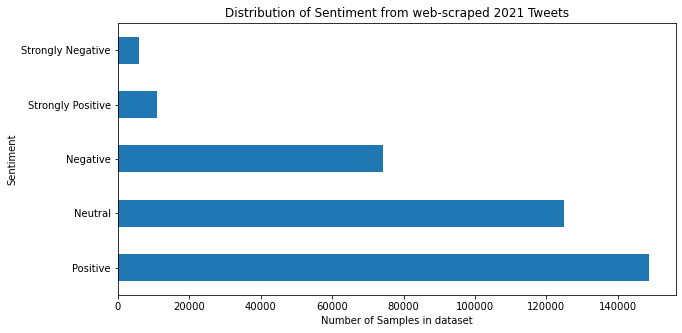

In [156]:
### Bar plot visualisation distribution of sentiment

plt.figure(figsize=(10,5))
ax = Tweets_2021['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in dataset')
ax.set_ylabel('Sentiment')
ax.set_title('Distribution of Sentiment from web-scraped 2021 Tweets')
plt.show()

Positive             148754
Neutral              124932
Negative              74399
Strongly Positive     10894
Strongly Negative      6021
Name: Sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Distribution of Web-scraped Tweets 2021'}, ylabel='Sentiment'>

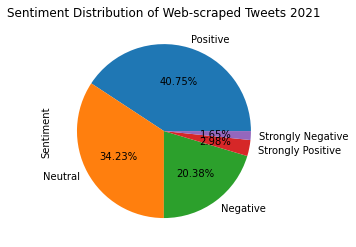

In [204]:
### Pie plot of Sentiment Analysis distribution
print(Tweets_2021['Sentiment'].value_counts())

Tweets_2021['Sentiment'].value_counts().plot(kind='pie',  labels=['Positive','Neutral','Negative', 'Strongly Positive', 'Strongly Negative'], 
                                             autopct='%.2f%%', title='Sentiment Distribution of Web-scraped Tweets 2021')

C:\Users\carlp\AppData\Local\Temp\ipykernel_1968\3747587291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_2021['Date'] = pd.to_datetime(Tweets_2021['Date'])


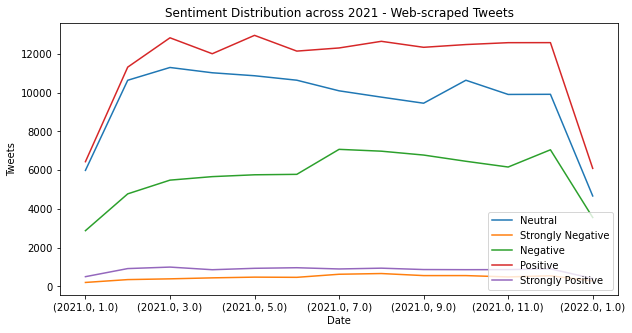

In [333]:
### Distribution of Sentiment flucuations across 2021

Tweets_2021['Date'] = pd.to_datetime(Tweets_2021['Date'])

Tweets_2021_2 = Tweets_2021.loc[Tweets_2021['Sentiment'] == 'Neutral']
Tweets_2021_2.groupby([(Tweets_2021_2['Date'].dt.year), (Tweets_2021_2['Date'].dt.month)]).size().plot(xlabel='Date', 
        ylabel='Tweets', label='Neutral', title='Sentiment Distribution across 2021 - Web-scraped Tweets', legend=True, figsize=(10,5))

Tweets_2021_2 = Tweets_2021.loc[Tweets_2021['Sentiment'] == 'Strongly Negative']
Tweets_2021.groupby([(Tweets_2021_2['Date'].dt.year), (Tweets_2021_2['Date'].dt.month)]).size().plot(xlabel='Date', 
        ylabel='Tweets', label='Strongly Negative', title='Sentiment Distribution across 2021 - Web-scraped Tweets', legend=True, figsize=(10,5))

Tweets_2021_2 = Tweets_2021.loc[Tweets_2021['Sentiment'] == 'Negative']
Tweets_2021.groupby([(Tweets_2021_2['Date'].dt.year), (Tweets_2021_2['Date'].dt.month)]).size().plot(xlabel='Date', 
        ylabel='Tweets', label='Negative', title='Sentiment Distribution across 2021 - Web-scraped Tweets', legend=True, figsize=(10,5))

Tweets_2021_2 = Tweets_2021.loc[Tweets_2021['Sentiment'] == 'Positive']
Tweets_2021.groupby([(Tweets_2021_2['Date'].dt.year), (Tweets_2021_2['Date'].dt.month)]).size().plot(xlabel='Date', 
        ylabel='Tweets', label='Positive', title='Sentiment Distribution across 2021 - Web-scraped Tweets', legend=True, figsize=(10,5))

Tweets_2021_2 = Tweets_2021.loc[Tweets_2021['Sentiment'] == 'Strongly Positive']
Tweets_2021.groupby([(Tweets_2021_2['Date'].dt.year), (Tweets_2021_2['Date'].dt.month)]).size().plot(xlabel='Date', 
       ylabel='Tweets', label='Strongly Positive', title='Sentiment Distribution across 2021 - Web-scraped Tweets', legend=True, figsize=(10,5))


plt.legend(loc = 'lower right')


In [110]:
### Most common words for Tweets_2021 dataset

most_common_words = pd.Series(' '.join(Tweets_2021['text_lemmatized']).split()).value_counts()[:20]
most_common_words

'vaccine',       371894
'covid',         241289
'covid19',       118991
'get',            65312
'people',         52268
'amp',            30291
'vaccinated',     26614
'dont',           26295
'getting',        25147
'one',            22171
'u',              21902
'vaccine']        21642
'shot',           20553
'death',          19810
'like',           19751
'say',            19248
'still',          19065
'got',            18852
'im',             17339
'know',           16757
dtype: int64

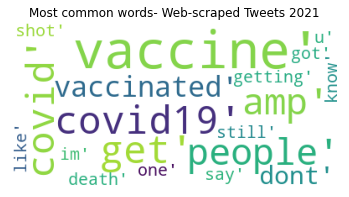

In [116]:
### Word Cloud of Tweets_2021 most common words

m_c_w = most_common_words.to_dict()
wordcloud = WordCloud(max_font_size=61.8, max_words=20, background_color="white").generate(' '.join(x for x in m_c_w.keys()))
plt.axis('off')
plt.title("Most common words- Web-scraped Tweets 2021")
plt.imshow(wordcloud)    

# DF_Covid_Vaccine Kaggle Tweet Sentiment Analysis Visualisation

Text(0.5, 1.0, 'Distribution of Sentiment from Kaggle Covid Vaccine dataset')

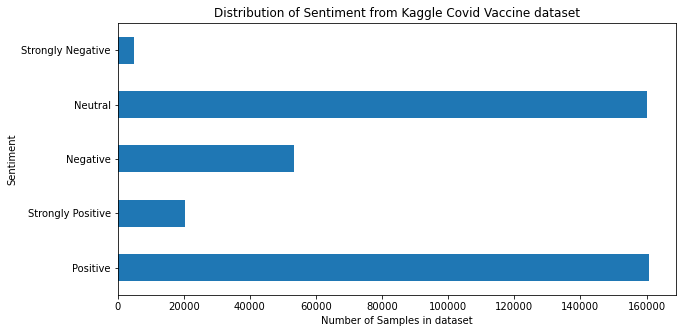

In [106]:
### DF_Covid_Vaccine dataset visualising distribution of sentiment
plt.figure(figsize=(10,5))
ax = DF_Covid_Vaccine['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in dataset')
ax.set_ylabel('Sentiment')
ax.set_title('Distribution of Sentiment from Kaggle Covid Vaccine dataset')

Positive             160761
Neutral              160210
Negative              53236
Strongly Positive     20456
Strongly Negative      4926
Name: Sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Distribution of Kaggle Tweets 2021'}, ylabel='Sentiment'>

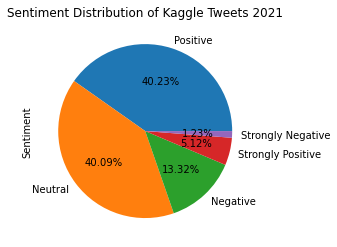

In [207]:
### Pie plot of Sentiment
print(DF_Covid_Vaccine['Sentiment'].value_counts())

DF_Covid_Vaccine['Sentiment'].value_counts().plot(kind='pie',  labels=['Positive','Neutral','Negative', 'Strongly Positive', 'Strongly Negative'], autopct='%.2f%%', title='Sentiment Distribution of Kaggle Tweets 2021')

In [111]:
### most common words for Kaggel Covid Vaccine tweets

most_common_words2 = pd.Series(' '.join(DF_Covid_Vaccine['text_lemmatized']).split()).value_counts()[:20]
most_common_words2

'covidvaccine',    266039
'vaccine',         110538
'covid19',          95137
'covid',            49781
'get',              45455
'slot',             38365
'vaccination',      31210
'amp',              30979
'vaccinated',       28287
'covidvaccine']     28177
'people',           27209
'dose',             23023
'free',             22296
'first',            19786
'today',            18826
'coronavirus',      18028
'covishield',       17794
'paid',             17687
'availability',     17585
'bengaluru',        17286
dtype: int64

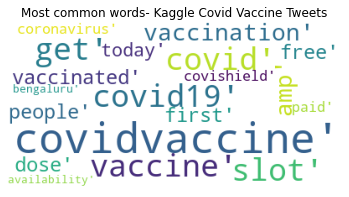

In [117]:
### Word Cloud of most common words in dataset
m_c_w2 = most_common_words2.to_dict()
wordcloud = WordCloud(max_font_size=61.8, max_words=20, background_color="white").generate(' '.join(x for x in m_c_w2.keys()))
plt.axis('off')
plt.title("Most common words- Kaggle Covid Vaccine Tweets")
plt.imshow(wordcloud)

# DF_Tweets_Canvas Tweet Sentiment Analysis Visualisation

Text(0.5, 1.0, 'Distribution of Sentiment from Canvas tweet dataset')

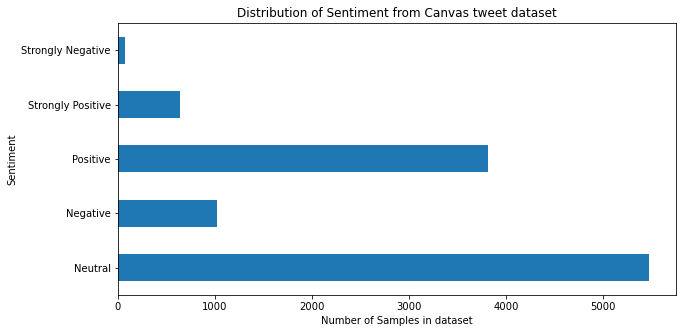

In [105]:
### Visualising DF_Tweets_Canvas Sentiment distribution

plt.figure(figsize=(10,5))
ax = DF_Tweets_Canvas['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in dataset')
ax.set_ylabel('Sentiment')
ax.set_title('Distribution of Sentiment from Canvas tweet dataset')

Neutral              5473
Positive             3812
Negative             1020
Strongly Positive     638
Strongly Negative      77
Name: Sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Distribution of Canvas Covid Vaccine Tweets'}, ylabel='Sentiment'>

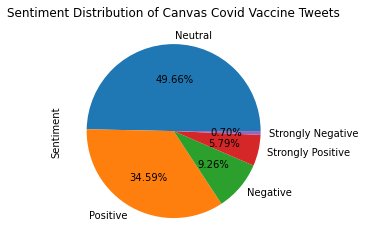

In [208]:
### Pie plot of Seniment distribution 
print(DF_Tweets_Canvas['Sentiment'].value_counts())

DF_Tweets_Canvas['Sentiment'].value_counts().plot(kind='pie',  labels=['Neutral','Positive','Negative', 'Strongly Positive', 'Strongly Negative'],
                                                  autopct='%.2f%%', title='Sentiment Distribution of Canvas Covid Vaccine Tweets')

C:\Users\carlp\AppData\Local\Temp\ipykernel_1968\4275953319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Tweets_Canvas['date'] = pd.to_datetime(DF_Tweets_Canvas['date'])


<AxesSubplot:title={'center':'Sentiment Distribution across 2021 - Canvas Tweets'}, xlabel='Date', ylabel='Tweets'>

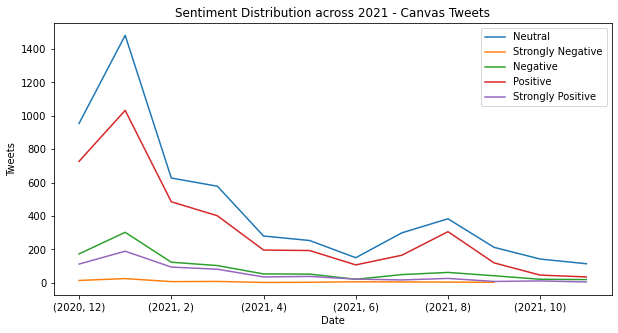

In [177]:
### Time course visualisation of sentiment fluctuation across 2021

DF_Tweets_Canvas['date'] = pd.to_datetime(DF_Tweets_Canvas['date'])

DF_Tweets_Canvas_2 = DF_Tweets_Canvas.loc[DF_Tweets_Canvas['Sentiment'] == 'Neutral']
DF_Tweets_Canvas_2.groupby([(DF_Tweets_Canvas_2['date'].dt.year), (DF_Tweets_Canvas_2['date'].dt.month)]).size().plot(xlabel='Date', ylabel='Tweets', label='Neutral', title='Sentiment Distribution across 2021 - Canvas Tweets', legend=True, figsize=(10,5))

DF_Tweets_Canvas_2 = DF_Tweets_Canvas.loc[DF_Tweets_Canvas['Sentiment'] == 'Strongly Negative']
DF_Tweets_Canvas_2.groupby([(DF_Tweets_Canvas_2['date'].dt.year), (DF_Tweets_Canvas_2['date'].dt.month)]).size().plot(xlabel='Date', ylabel='Tweets', label='Strongly Negative', title='Sentiment Distribution across 2021 - Canvas Tweets', legend=True, figsize=(10,5))

DF_Tweets_Canvas_2 = DF_Tweets_Canvas.loc[DF_Tweets_Canvas['Sentiment'] == 'Negative']
DF_Tweets_Canvas_2.groupby([(DF_Tweets_Canvas_2['date'].dt.year), (DF_Tweets_Canvas_2['date'].dt.month)]).size().plot(xlabel='Date', ylabel='Tweets', label='Negative', title='Sentiment Distribution across 2021 - Canvas Tweets', legend=True, figsize=(10,5))

DF_Tweets_Canvas_2 = DF_Tweets_Canvas.loc[DF_Tweets_Canvas['Sentiment'] == 'Positive']
DF_Tweets_Canvas_2.groupby([(DF_Tweets_Canvas_2['date'].dt.year), (DF_Tweets_Canvas_2['date'].dt.month)]).size().plot(xlabel='Date', ylabel='Tweets', label='Positive', title='Sentiment Distribution across 2021 - Canvas Tweets', legend=True, figsize=(10,5))

DF_Tweets_Canvas_2 = DF_Tweets_Canvas.loc[DF_Tweets_Canvas['Sentiment'] == 'Strongly Positive']
DF_Tweets_Canvas_2.groupby([(DF_Tweets_Canvas_2['date'].dt.year), (DF_Tweets_Canvas_2['date'].dt.month)]).size().plot(xlabel='Date', ylabel='Tweets', label='Strongly Positive', title='Sentiment Distribution across 2021 - Canvas Tweets', legend=True, figsize=(10,5))


In [112]:
### most common words for Canvas Covid Vaccine tweets

most_common_words3 = pd.Series(' '.join(DF_Tweets_Canvas['text_lemmatized']).split()).value_counts()[:20]
most_common_words3

'pfizerbiontech',     5489
'vaccine',            4920
'covid19',            2258
'dose',               1457
'pfizer',             1391
'first',               975
'today',               767
'vaccinated',          693
'covidvaccine',        680
'covid',               665
'vaccination',         652
'get',                 563
'shot',                538
'dos',                 489
'amp',                 474
['pfizerbiontech',     451
'pfizervaccine',       438
'second',              432
'moderna',             412
'people',              411
dtype: int64

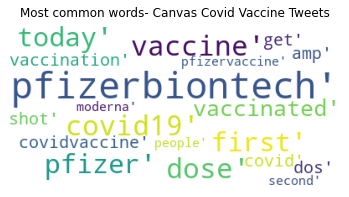

In [118]:
### Word cloud of most common words

m_c_w3 = most_common_words3.to_dict()
wordcloud = WordCloud(max_font_size=61.8, max_words=20, background_color="white").generate(' '.join(x for x in m_c_w3.keys()))
plt.axis('off')
plt.title("Most common words- Canvas Covid Vaccine Tweets")
plt.imshow(wordcloud)

# Machine Learning Approach to Sentiment Analysis

Next I explored if a machine learning classification model could successfully categorise the tweets into polarised groups. 
For this section I selected my own collected tweets as the dataset for analysis, therefore providing new insights on a unique dataset.

In [261]:
### Preparing the Tweets_2021 dataset for ML model application

### counting the number of unique words in the dataset
unique_words = set(Tweets_2021['text_lemmatized'])
count = 0
for word in unique_words:
  count += 1
print(count)


288701


In [263]:
### Tokenization of the tweets
tweet_tokenizer = Tokenizer(num_words = 288701, split=' ')
###num_words = the maximum number of words to keep, based on word frequency. Only the most common num_words words will be kept.

tweet_tokenizer.fit_on_texts(Tweets_2021['text_lemmatized'].values)

X = tweet_tokenizer.texts_to_sequences(Tweets_2021['text_lemmatized'].values)

In [264]:
### Padding to make all text vector the same length
### this is useful for compressing the tweets into a better form for the model

X = pad_sequences(X)

In [265]:
X

array([[     0,      0,      0, ...,    192,     18,   1125],
       [     0,      0,      0, ...,    571,    119, 181211],
       [     0,      0,      0, ...,     94,   2100,      1],
       ...,
       [     0,      0,      0, ...,     60,    195, 181065],
       [     0,      0,      0, ...,     27,      2,    260],
       [     0,      0,      0, ...,    164,   1241,      1]])

In [266]:
### Encoding the dependent y variable
### Here using the pandas get_dummies function to set each value to a dummy/indicator value, similar to using One Hot Encoder
y = pd.get_dummies(Tweets_2021['Sentiment']).values

y

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [267]:
### Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [269]:
### Normalise the data for ease of processing using StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

The data is now prepared for classification model application

# K-Neighbor Classification

In [270]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [271]:
### Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
accuracy_score(y_test, y_pred)

[[ 6984  2714  5176     8    19]
 [ 6395 12922  5535    23    41]
 [ 9487  5797 14420    18    55]
 [  541   295   374    31     0]
 [  852   614   639     4    56]]


0.4179041095890411

Accuracy score of 0.42 is quite low and would indicate that this model has struggled to classify the sentiment of the Covid Vaccine tweets

# Recurrent Neural Network

In [315]:
#creating models RNN

RNN_model= Sequential()                                       ###using Keras Sequential for time series data analysis
RNN_model.add(Embedding(288701, 256 , input_length = X.shape[1]))   ### setting the network shape limits
RNN_model.add(Dropout(0.3))


RNN_model.add(LSTM(128 , return_sequences=True , dropout=0.3 , recurrent_dropout=0.3))  ### employing Long Short Term Memory (LSTM)
RNN_model.add(LSTM(128,dropout=0.3 , recurrent_dropout=0.3))

RNN_model.add(Dense(5 , activation='softmax'))

RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 99, 256)           73907456  
                                                                 
 dropout_1 (Dropout)         (None, 99, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 99, 128)           197120    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 74,236,805
Trainable params: 74,236,805
Non-trainable params: 0
_________________________________________________________________


In [316]:
RNN_model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])  
### adam optimiser reduces computational burden and therefore should increase model speed
### categorical_crossentrophy calculates the loss between the label and prediction and is useful for multiple label classes 

In [317]:
#training model

batch_size = 128
epochs = 3                         ### repetitions of the model

In [318]:
### running the model

RNN_model_history = RNN_model.fit(X_train , y_train ,
          epochs = epochs,
          batch_size = batch_size,
          validation_split=0.1,
          verbose=1)


Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2054/2054 [==============================] - ETA: 0s - loss: 1.2007 - accuracy: 0.4433WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001AD1C7B2DC0> and will run it as-is.
Please report this to the TensorFlow team. When fil

In [319]:
### Evaluating the model with the test set

%%time

score = RNN_model.evaluate(X_test, y_test , batch_size = batch_size)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

571/571 [==============================] - 148s 259ms/step - loss: 1.1921 - accuracy: 0.4550

ACCURACY: 0.45500001311302185
LOSS: 1.1920589208602905
CPU times: total: 9min 54s
Wall time: 2min 28s


In [320]:
### max element in array
y_test = np.argmax(y_test , axis=1)

In [323]:
### Making predictions on the test set

predictions = RNN_model.predict(X_test)
y_pred_1 = np.argmax(predictions , axis=1)
y_pred_1[:10]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2282/2282 [==============================] - 258s 113ms/step


array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], dtype=int64)

In [324]:
### Confusion Matrix

print(confusion_matrix(y_test , y_pred_1))

[[    0  3076 11825     0     0]
 [    0 10747 14169     0     0]
 [    0  7309 22468     0     0]
 [    0   278   963     0     0]
 [    0   657  1508     0     0]]


In [326]:
### Display the final classification report of the model

print(classification_report(y_test , Y_pred_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14901
           1       0.49      0.43      0.46     24916
           2       0.44      0.75      0.56     29777
           3       0.00      0.00      0.00      1241
           4       0.00      0.00      0.00      2165

    accuracy                           0.46     73000
   macro avg       0.19      0.24      0.20     73000
weighted avg       0.35      0.46      0.38     73000



C:\Users\carlp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score of 0.46 is a low evaluation score for the model. 

# Results and Conclusions

Overall Positive and Neutral sentiment to Covid-19 Vaccine, ~70% of total dataset
KNN model accuracy score 0.42
RNN model accuracy score 0.46
TextBlob for sentiment determination usually produced 0.5-0.6 accuracy score. Hyperparameters and use of VADER might help 
improve the models performance
